In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd

/home/eele/miniconda3/envs/id2223/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196773
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
wine_df = pd.read_csv("./dataset/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Preprocessing Dataset



In [4]:
wine_df = wine_df.fillna(wine_df.mean())
wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine_df.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


### Exploratory Data Analysis (EDA)  our Wine data


2023-11-17 16:09:45,986 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 16:09:45,999 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot: xlabel='quality', ylabel='count'>

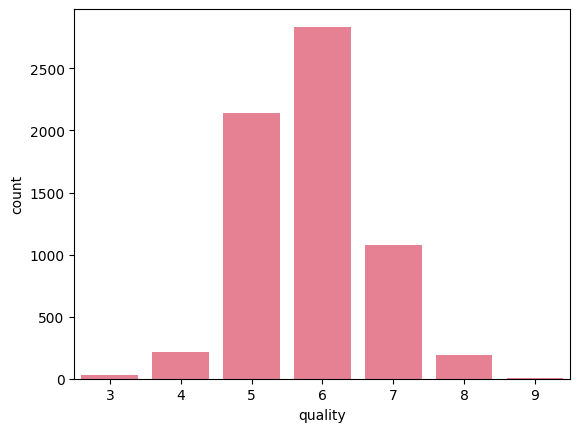

In [13]:
# create plots
sns.countplot(x='quality', data=wine_df)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265838
chlorides               0.200818
citric acid             0.085699
fixed acidity           0.076967
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038713
residual sugar          0.036819
pH                      0.019356
dtype: float64


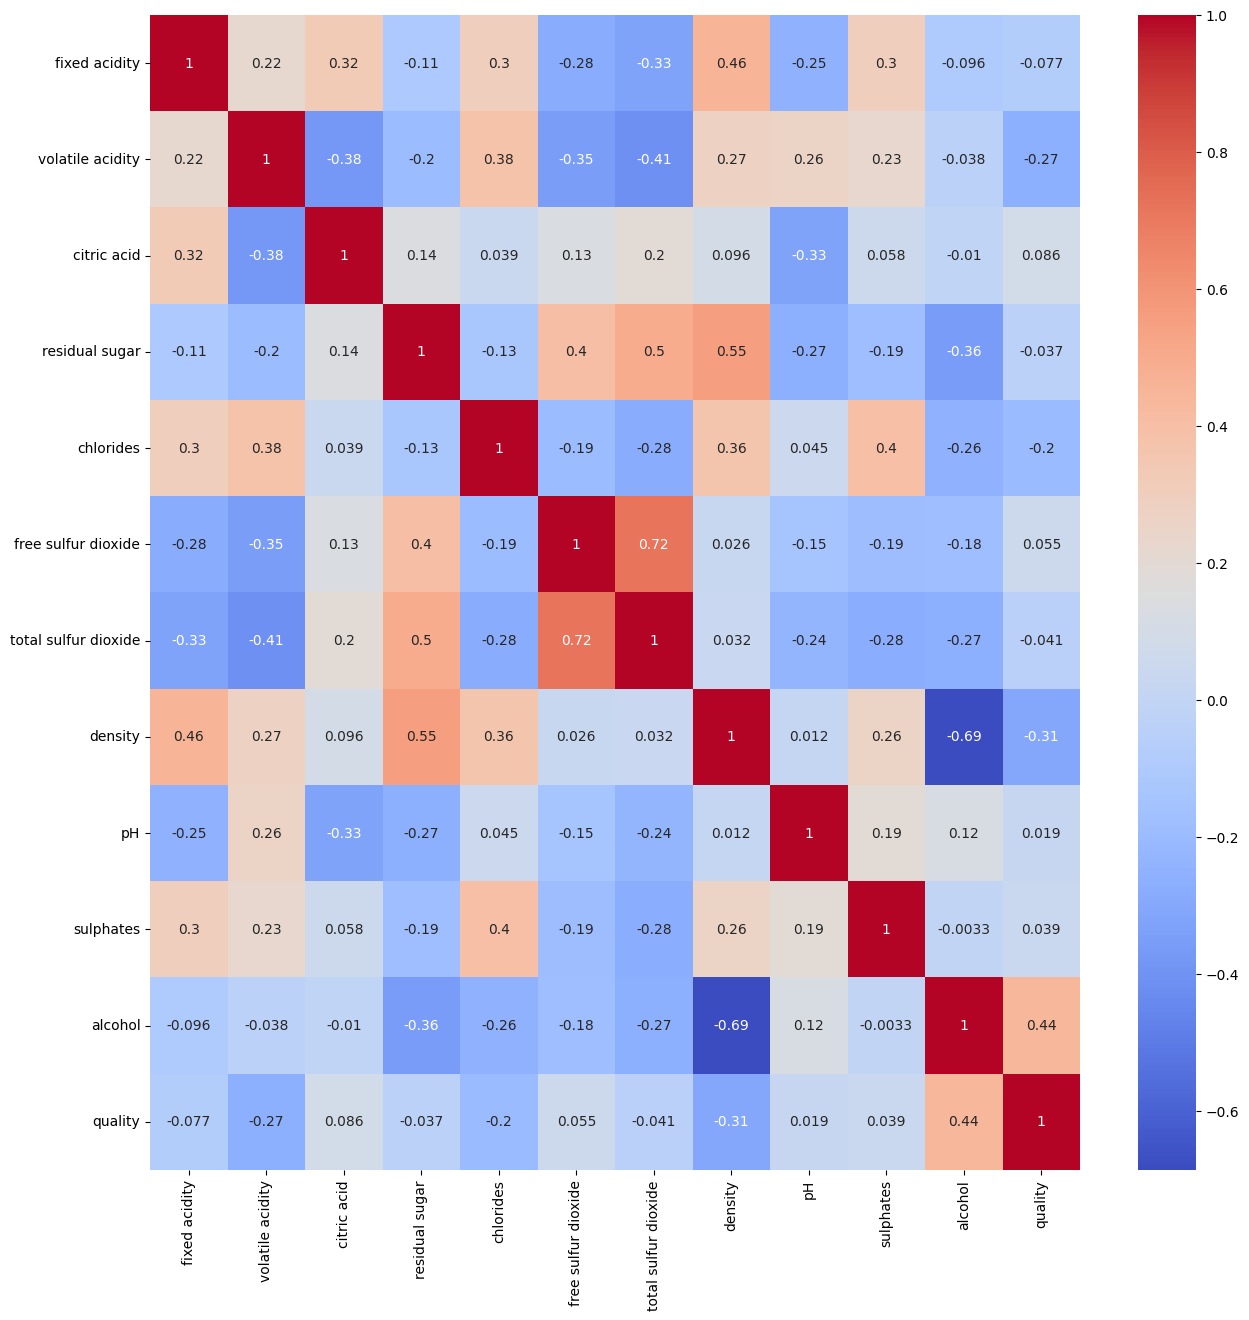

In [10]:
corr = wine_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# absolute value then sort_values
corr = corr.abs().unstack()
corr = corr.sort_values(ascending=False)
# only print quality
print(corr['quality'])

The most important features for quality are:  
alcohol                 0.444319   
density                 0.305858   
volatile acidity        0.265838   
chlorides               0.200818   
citric acid             0.085699   
fixed acidity           0.076967   

### Visualize range of values 

2023-11-18 15:42:05,279 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 15:42:05,304 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


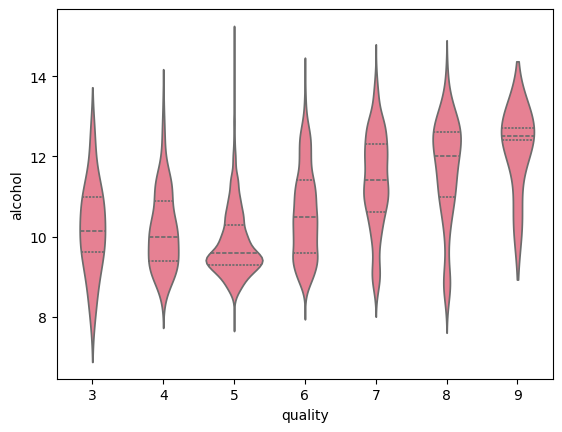

2023-11-18 15:42:05,649 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 15:42:05,663 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


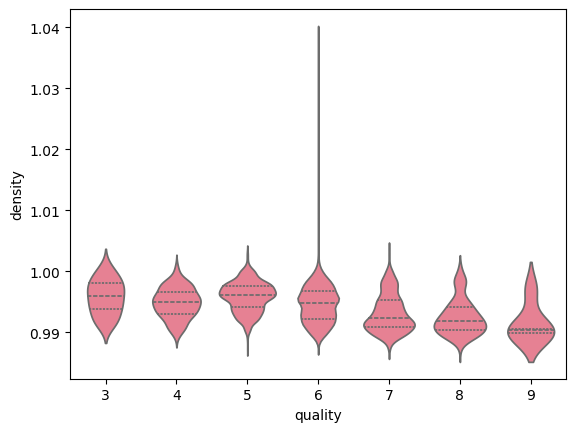

2023-11-18 15:42:06,163 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 15:42:06,213 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


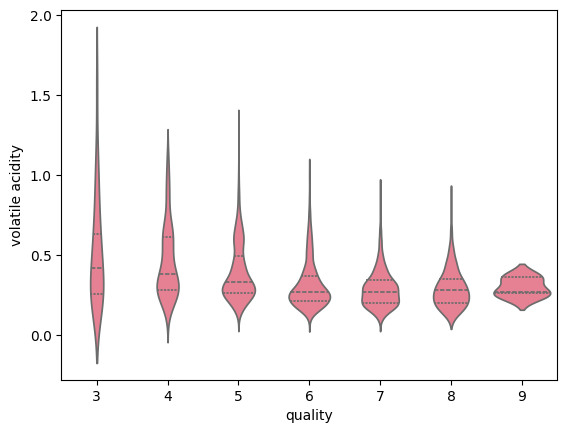

2023-11-18 15:42:06,738 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 15:42:06,764 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


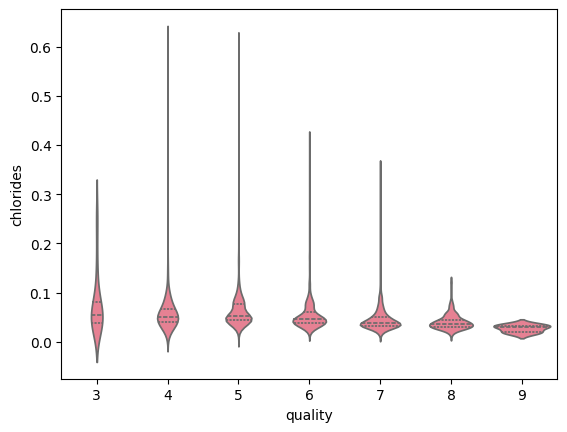

2023-11-18 15:42:07,051 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 15:42:07,066 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


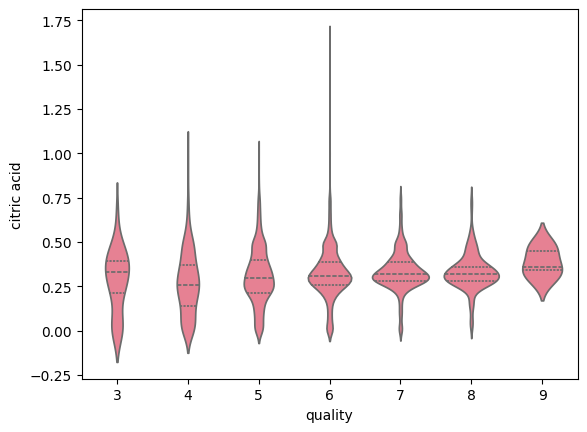

2023-11-18 15:42:07,342 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 15:42:07,358 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


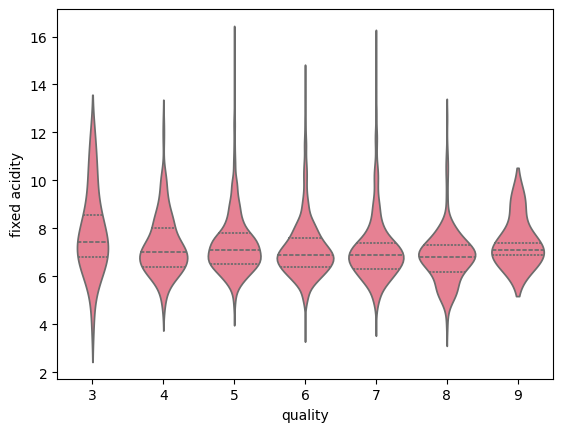

In [5]:
# visualise range of values for quality compared to other features
# alcohol                 0.444319   
# density                 0.305858   
# volatile acidity        0.265838   
# chlorides               0.200818   
# citric acid             0.085699   
# fixed acidity           0.076967  

g = sns.violinplot(x='quality', y='alcohol', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x='quality', y='density', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x='quality', y='volatile acidity', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x='quality', y='chlorides', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x='quality', y='citric acid', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x='quality', y='fixed acidity', data=wine_df, inner='quartile')
plt.show()


### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [6]:
wine_df.columns = wine_df.columns.str.replace(' ', '_')
wine_df.columns = wine_df.columns.str.lower()
wine_df['type'] = wine_df['type'].astype('category').cat.codes

In [15]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["alcohol","density","volatile_acidity","chlorides","citric_acid","fixed_acidity"],
    description="Wine Dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/196773/fs/196692/fg/229748


Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:08 | Remaining Time: 00:00


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/196773/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f2eeaff7d00>, None)

# Synthetic Generator



In [10]:
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
num_cols = wine_df.columns.tolist()
num_cols.remove('quality')

cat_cols = ['quality']

# # Define model and training parameters
ctgan_args = ModelParameters(batch_size=500, lr=2e-4, betas=(0.5, 0.9))
train_args = TrainParameters(epochs=20)

# # Train the generator model
synth = RegularSynthesizer(modelname='ctgan', model_parameters=ctgan_args)
synth.fit(data=wine_df, train_arguments=train_args, num_cols=num_cols, cat_cols=cat_cols)

# # Generate 1000 new synthetic samples
synth_data = synth.sample(1) 
print(synth_data)


Epoch: 0 | critic_loss: 3.6128010749816895 | generator_loss: 1.8202354907989502
Epoch: 1 | critic_loss: 0.44672948122024536 | generator_loss: 1.3045107126235962
Epoch: 2 | critic_loss: 0.1944558024406433 | generator_loss: 1.154731273651123
Epoch: 3 | critic_loss: 0.2903306186199188 | generator_loss: 1.0225632190704346
Epoch: 4 | critic_loss: 0.26766887307167053 | generator_loss: 0.9180101156234741
Epoch: 5 | critic_loss: 0.10503283143043518 | generator_loss: 0.9709994792938232
Epoch: 6 | critic_loss: 0.35422730445861816 | generator_loss: 0.6044214963912964
Epoch: 7 | critic_loss: 0.22832363843917847 | generator_loss: 0.4646705389022827
Epoch: 8 | critic_loss: 0.26693135499954224 | generator_loss: 0.13734012842178345
Epoch: 9 | critic_loss: 0.038427382707595825 | generator_loss: 0.23527884483337402
Epoch: 10 | critic_loss: 0.13296057283878326 | generator_loss: 0.04224824905395508
Epoch: 11 | critic_loss: 0.10780775547027588 | generator_loss: -0.15941756963729858
Epoch: 12 | critic_loss:

In [37]:
import os
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
# We will now upload our model to the Hopsworks Model Registry. First get an object for the model registry.
mr = project.get_model_registry()

# The contents of the 'iris_model' directory will be saved to the model registry. Create the dir, first.
model_dir="wine_generator"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

# Save both our model and the confusion matrix to 'model_dir', whose contents will be uploaded to the model registry
synth.save(model_dir + '/wine_generator.pkl')

# Create a schema for the model
input_schema = Schema(wine_df)
output_schema = Schema(wine_df)
model_schema = ModelSchema(input_schema, output_schema)

# Create an entry in the model registry that includes the model's name, desc, metrics
wine_generator = mr.python.create_model(
    name="wine_generator", 
    model_schema=model_schema,
    description="Wine Generator Model",
)

Connected. Call `.close()` to terminate connection gracefully.


In [38]:
# Upload the model to the model registry, including all files in 'model_dir'
wine_generator.save(model_dir)

Uploading: 100.000%|██████████| 934846/934846 elapsed<00:02 remaining<00:00  2.88it/s]
Uploading: 100.000%|██████████| 2017/2017 elapsed<00:01 remaining<00:000:05,  1.42s/it]
Model export complete: 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]                   

Model created, explore it at https://c.app.hopsworks.ai:443/p/196773/models/wine_generator/1


Model(name: 'wine_generator', version: 1)

In [35]:
from ydata_synthetic.synthesizers.regular import RegularSynthesizer

#Loading the synthesizer
synthesizer = RegularSynthesizer.load(model_dir + '/wine_generator.pkl')